In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings("ignore")


In [46]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [47]:
df = pd.read_csv ("CC GENERAL.csv")

In [48]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [51]:
(df.isnull().sum() * 100/df.shape[0]).sort_values(ascending = False)

MINIMUM_PAYMENTS                    3.497207
CREDIT_LIMIT                        0.011173
CUST_ID                             0.000000
BALANCE                             0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_FREQUENCY                 0.000000
CASH_ADVANCE                        0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

<Axes: >

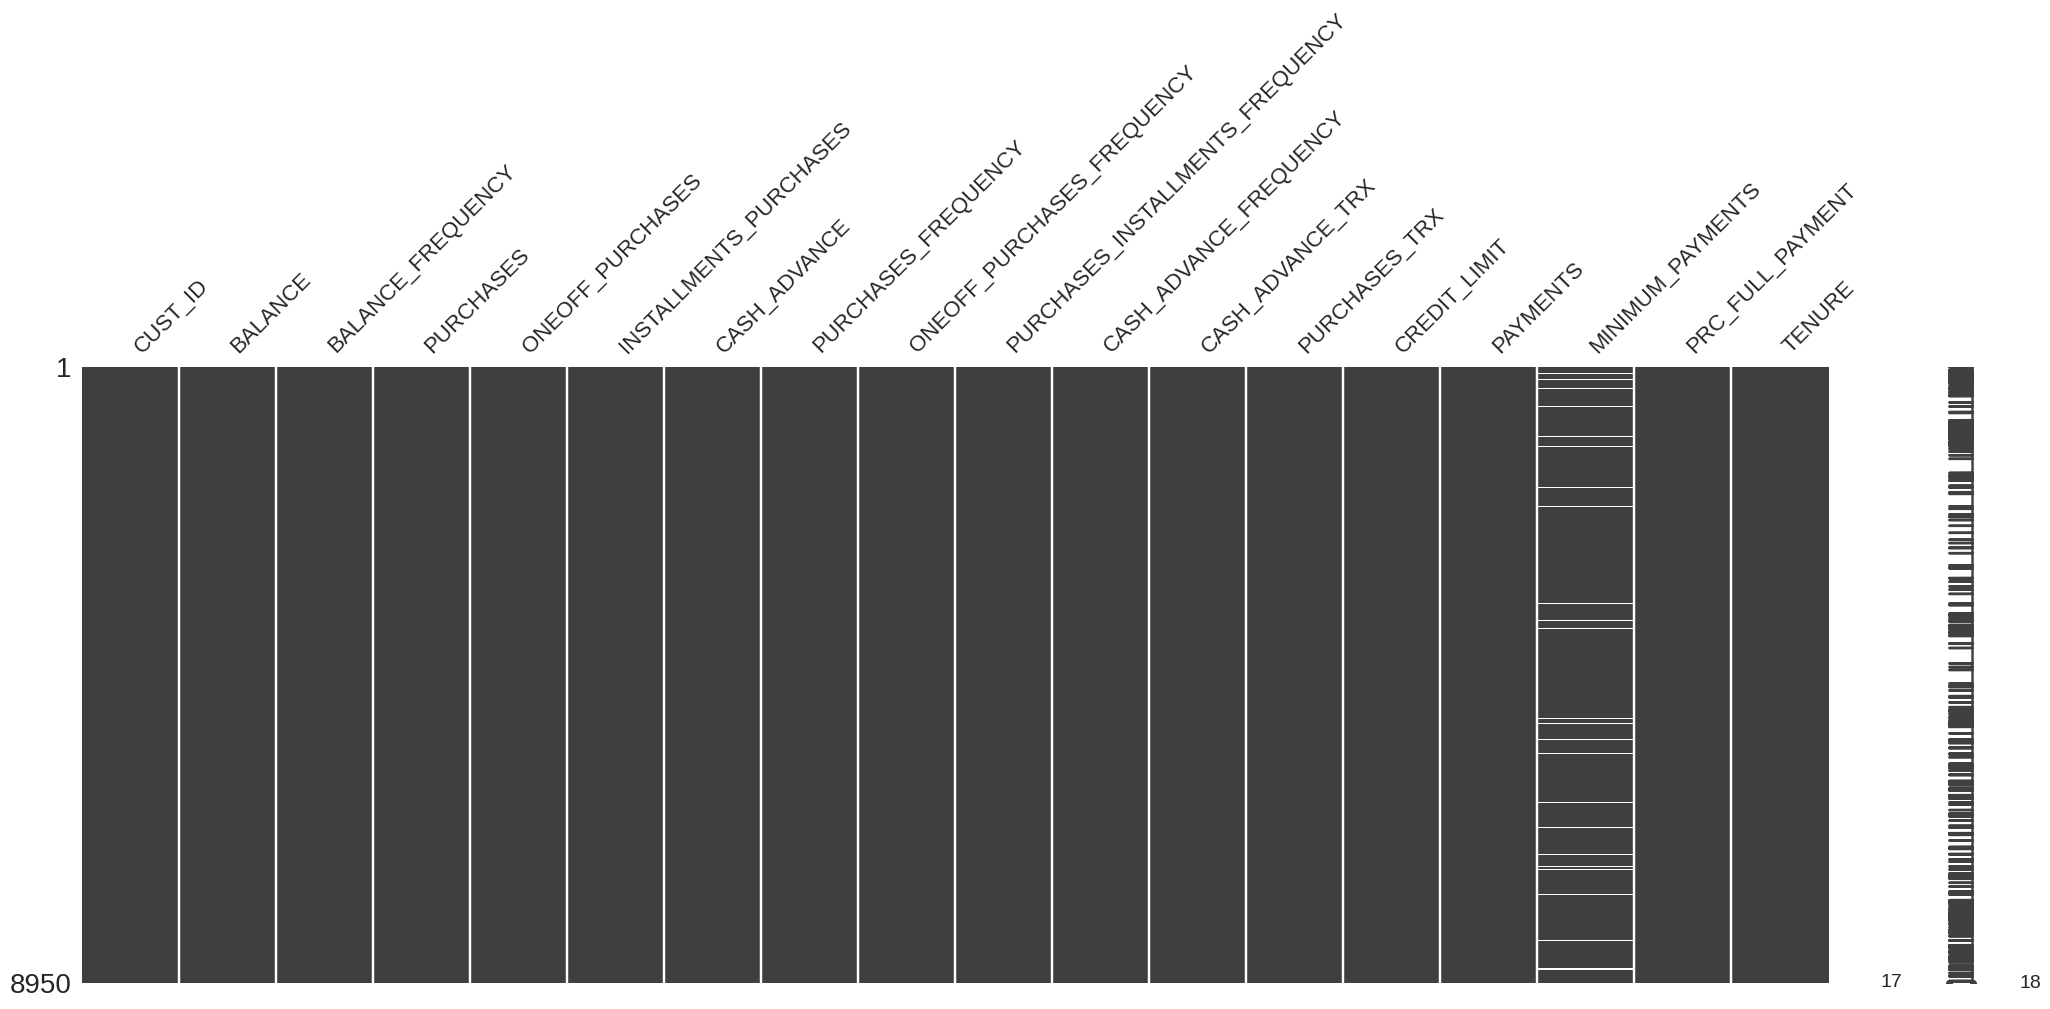

In [52]:
msno.matrix(df, figsize = (25, 8))

In [53]:
df.drop(columns = 'CUST_ID', inplace = True)

In [54]:
df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

In [55]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [56]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


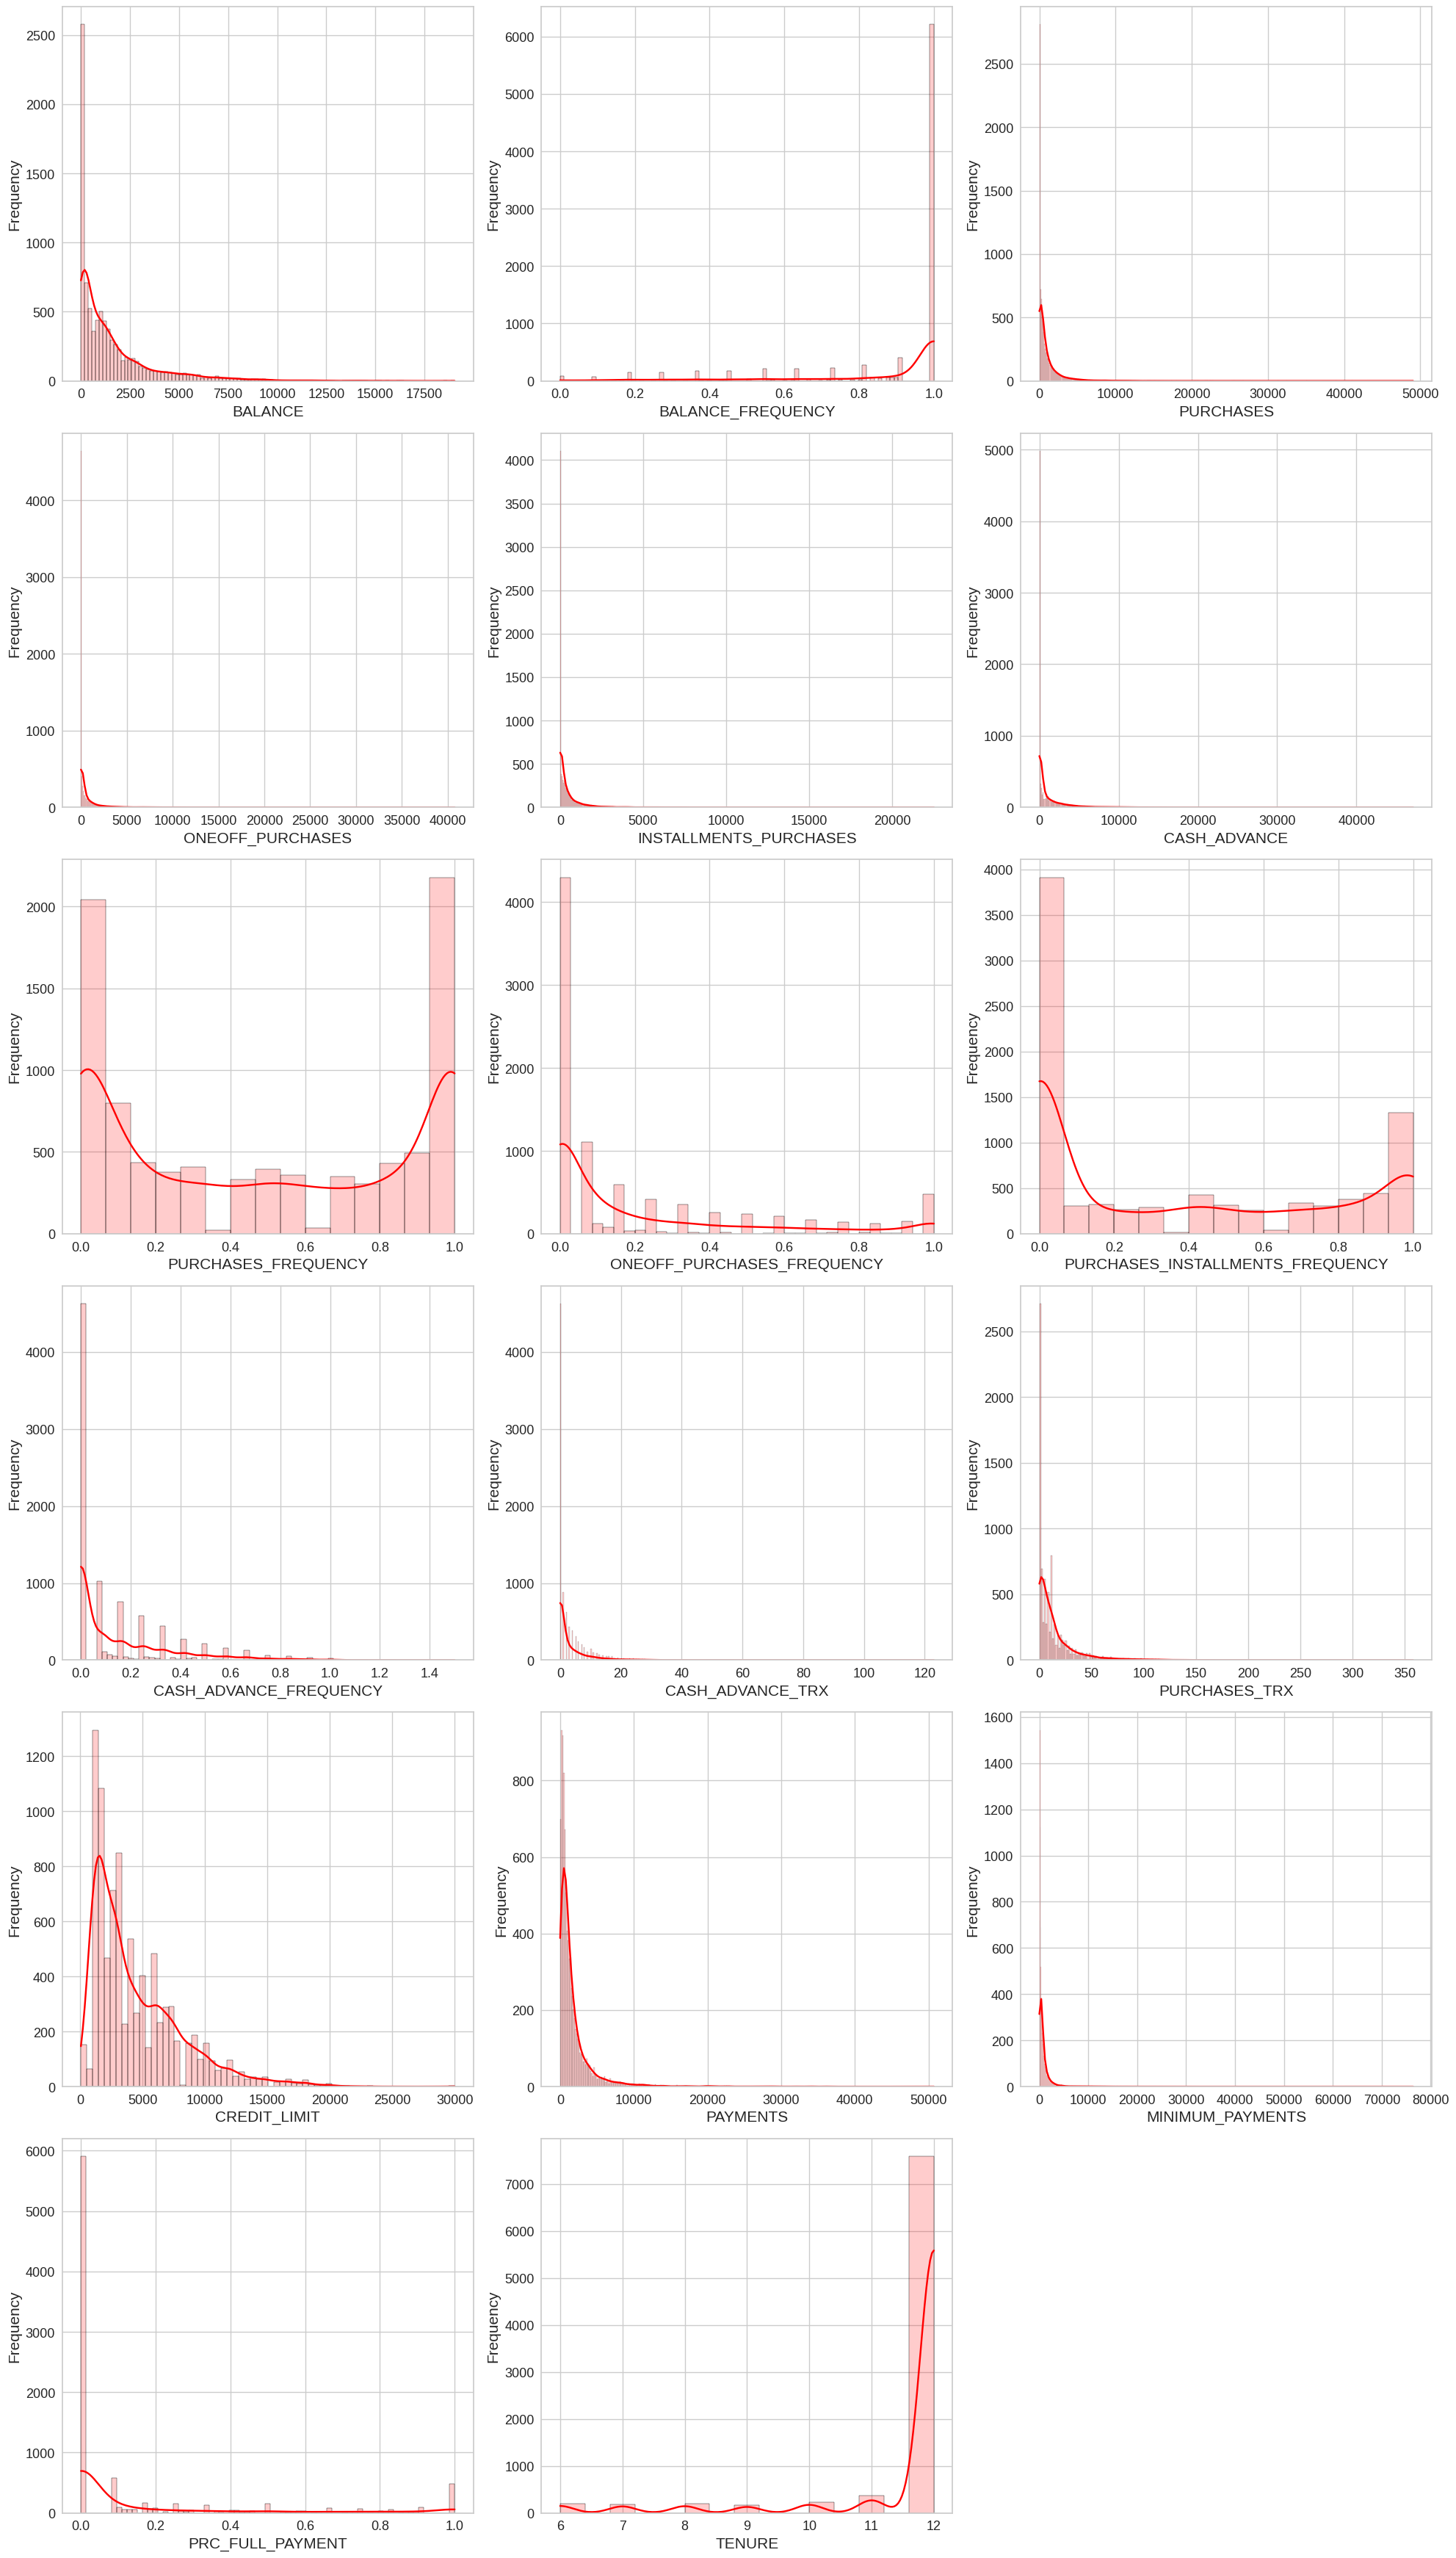

In [57]:
fig = plt.figure(figsize = (20, 35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(6, 3, i+1)
    sns.histplot(df, x = col, ax = ax, color = 'red', kde = True, alpha = 0.2)
    plt.xlabel(col, fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

<Axes: >

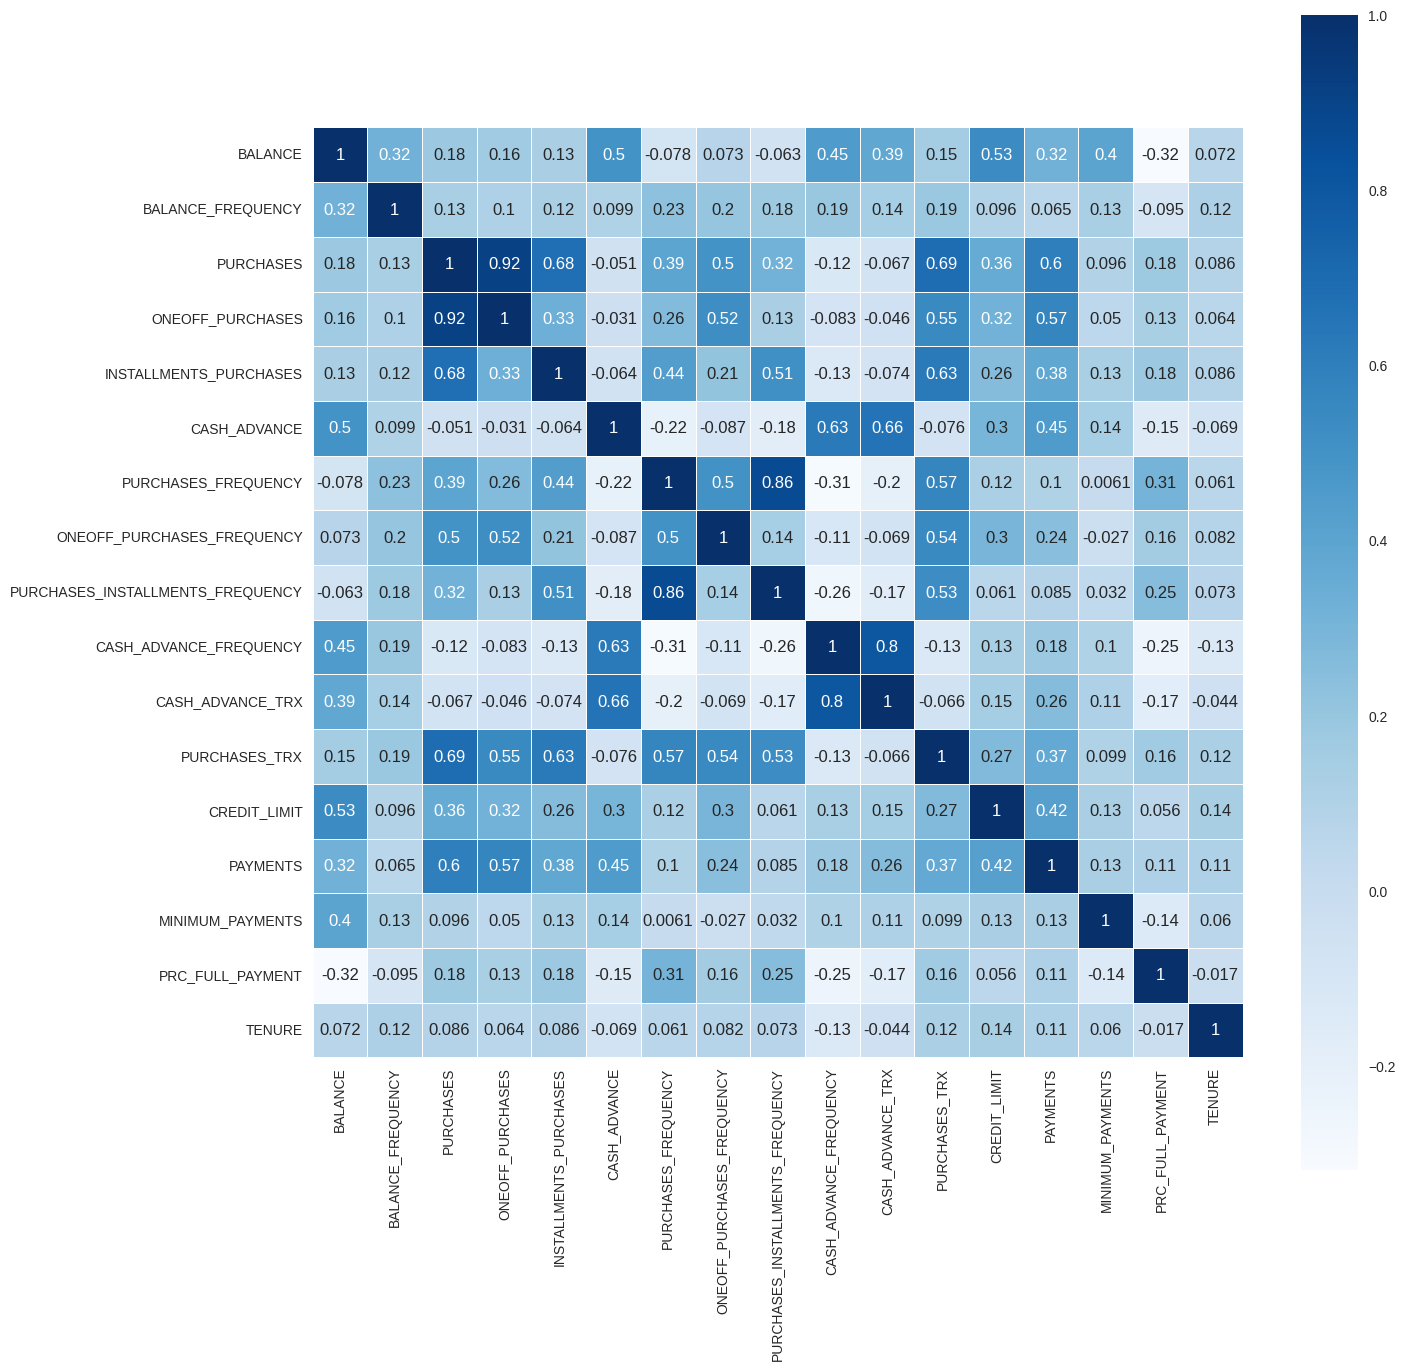

In [58]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), cmap = 'Blues', square = True, annot = True, linewidths = 0.5)

In [59]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [60]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

In [61]:
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])

In [62]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.683768,-1.072570,0.477244,0.679144,0.043123,0.069705,0.821505,-0.018196,0.119090,-0.078315,-0.235969,-0.052486,-0.081678,-0.187938,0.149983,0.048263,-0.000161
1,-1.134846,2.508738,0.603529,-0.110178,0.668379,-1.096278,-0.385953,0.176700,0.675836,-0.778006,-0.870632,-0.607215,-0.034566,-0.733211,-0.532871,-0.082865,0.000003
2,0.969060,-0.383487,0.092648,1.236655,-2.166478,-0.332914,-1.540257,-0.230296,-0.868963,-0.001768,-0.762181,0.683761,0.696609,0.042282,0.221696,0.511340,0.000022
3,-0.888423,0.004393,1.501618,1.073551,0.226286,-0.169366,-0.236559,-0.690792,-0.064210,0.393873,0.747575,0.119301,-0.128146,-0.417171,-0.091883,-0.016222,-0.000010
4,-1.600261,-0.684049,0.349762,1.012481,-0.454576,0.076857,0.697249,0.246259,0.578784,-0.122271,-0.455086,-0.108767,-0.037412,-0.041019,0.290902,-0.070578,-0.000081


In [63]:
evr = list(pca.explained_variance_ratio_)

In [64]:
evr = sorted(evr, reverse=True)
# Cummulative explained variance ratio
evr_cum = list(pca.explained_variance_ratio_.cumsum())
num_components = [x + 1 for x in range(X_pca.shape[1])]

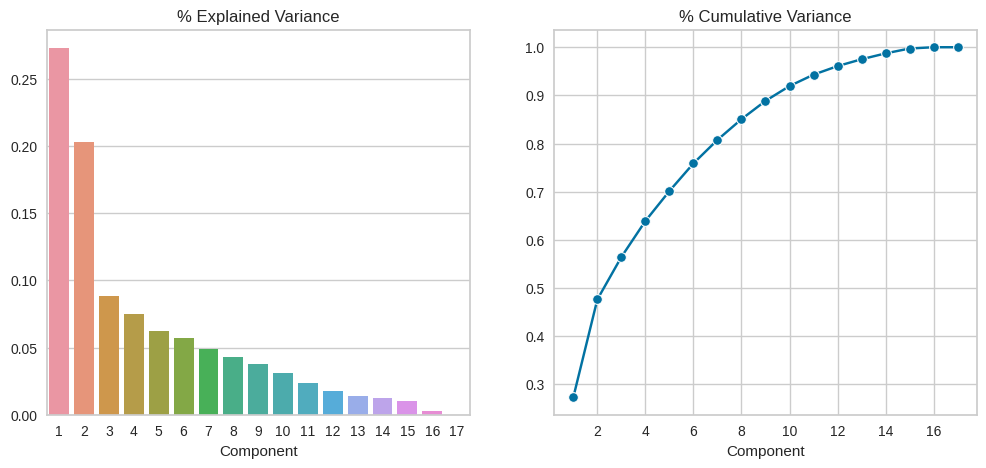

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = num_components, y = evr, ax = ax[0])
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = num_components, y = evr_cum, marker = 'o' ,ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

In [66]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.683767,-1.072569,0.477277,0.679005,0.043114
1,-1.134846,2.508739,0.603545,-0.110249,0.668374
2,0.969062,-0.383481,0.092831,1.235906,-2.166525
3,-0.888423,0.004394,1.501644,1.073439,0.226279
4,-1.600262,-0.684050,0.349730,1.012613,-0.454567


In [67]:

kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1, 10)]

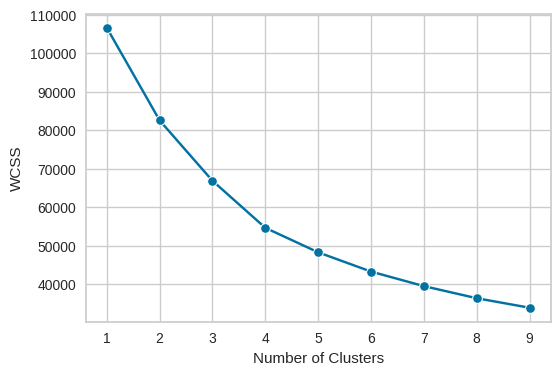

In [68]:
inertias = [model.inertia_ for model in kmeans_models]
fig = plt.figure(figsize = (6,4))
sns.lineplot(x = list(range(1, 10)), y = inertias, marker = 'o')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()


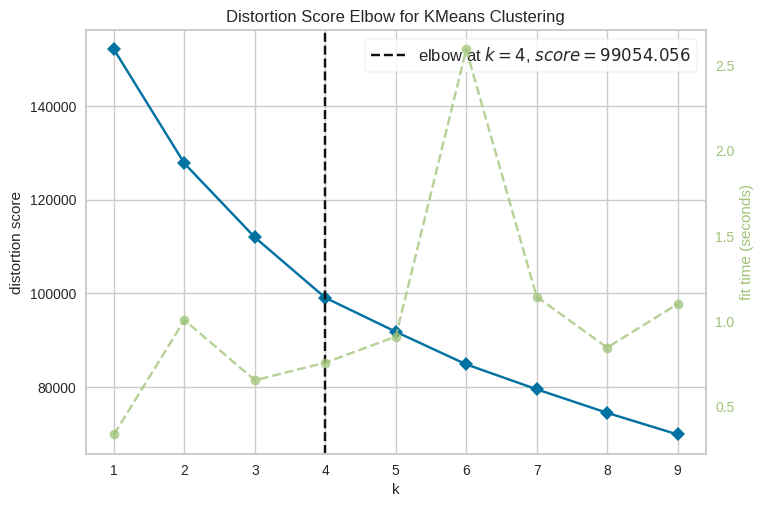

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:

kmeans = KMeans(n_clusters=4, random_state=0)
vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

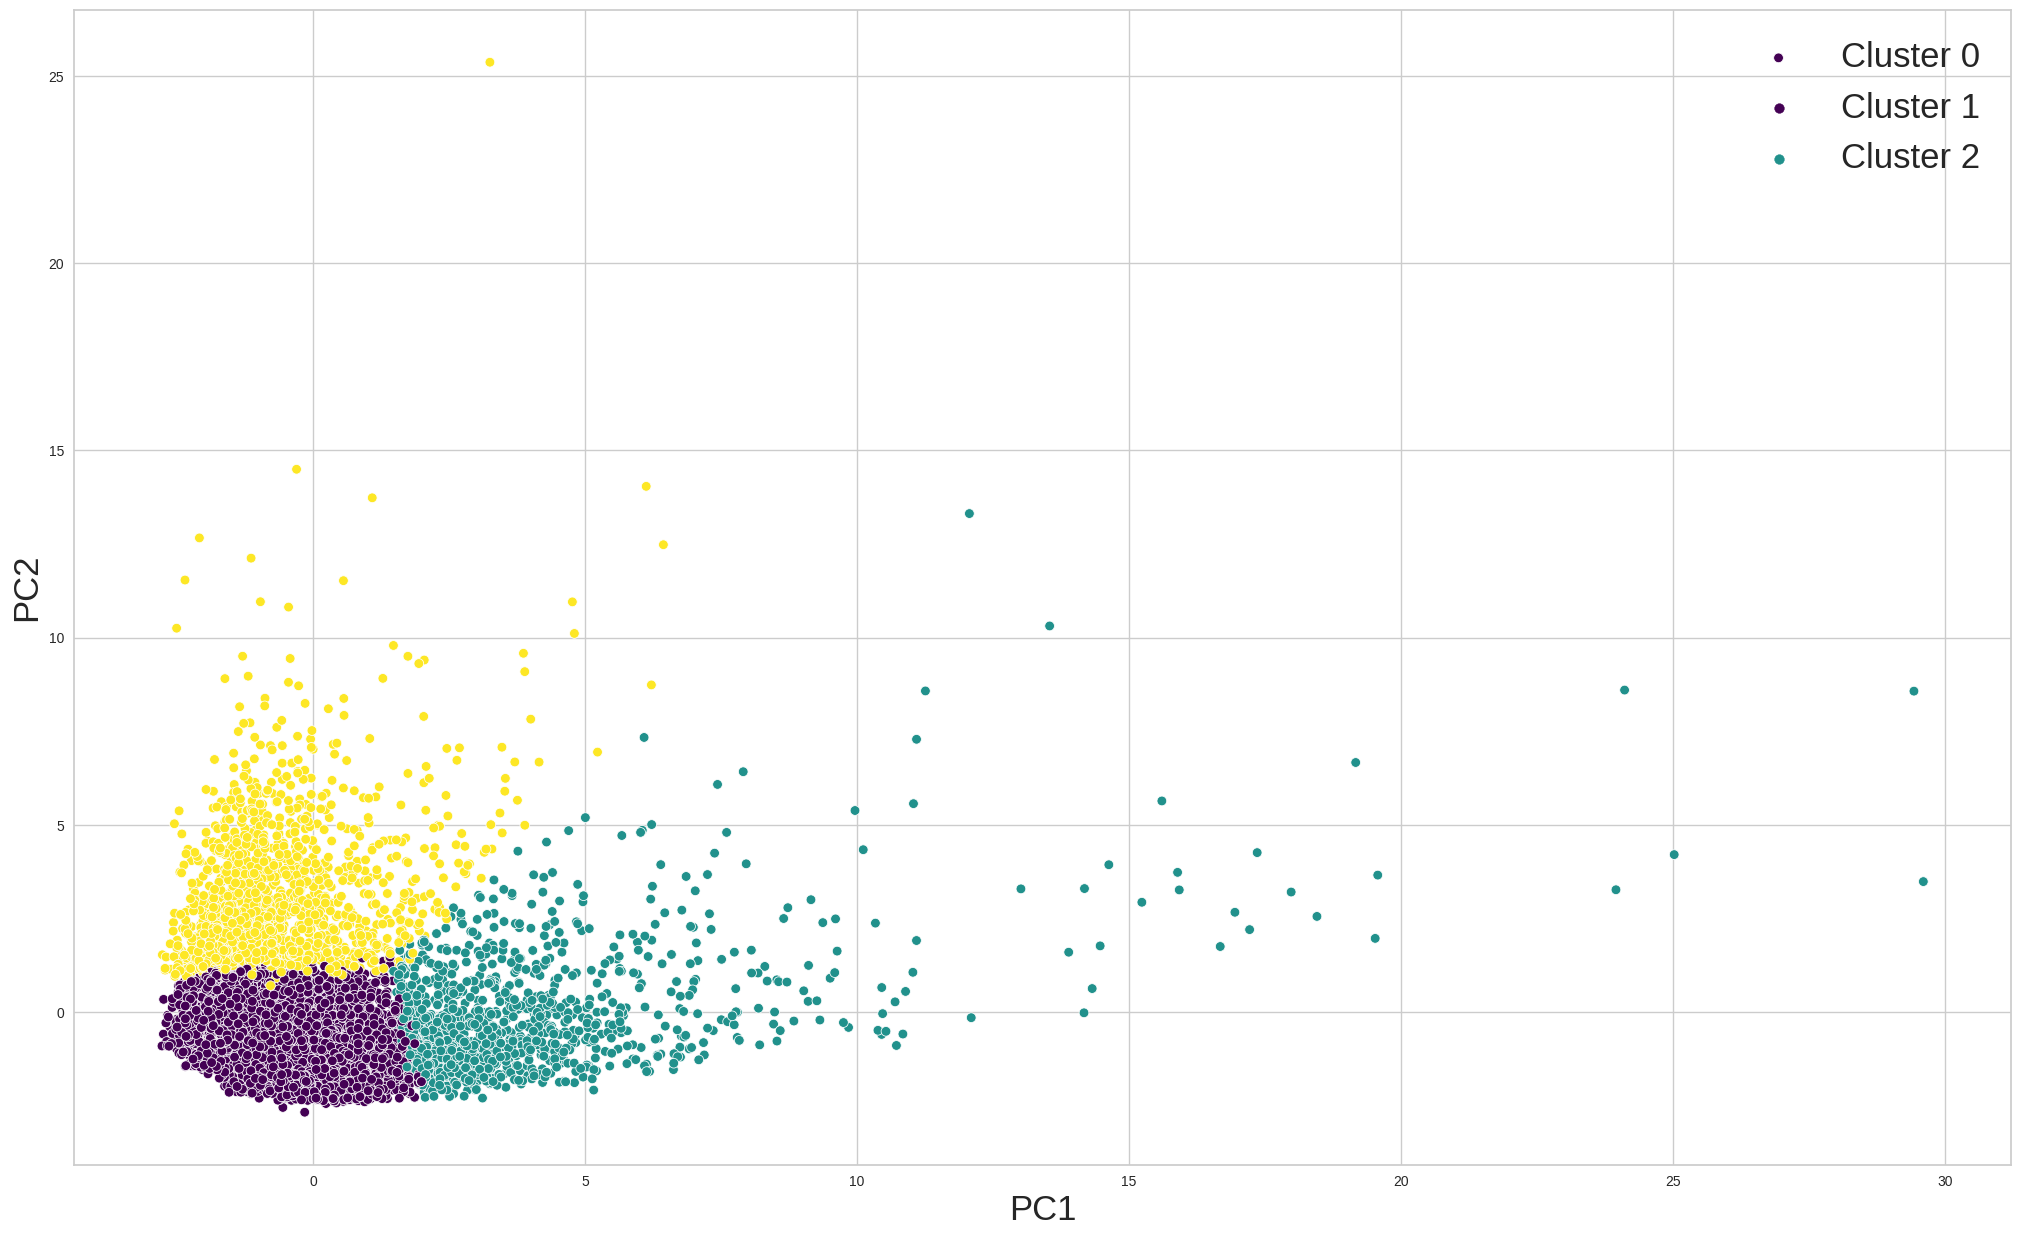

In [70]:
kmeans = KMeans(n_clusters = 3, random_state=0)

pca_labels = kmeans.fit_predict(X_pca)
plt.figure(figsize=(25,15))
sns.scatterplot(data = df_pca, x= "PC1", y= "PC2", hue = pca_labels, palette='viridis', )
plt.xlabel("PC1", fontsize = 25)
plt.ylabel("PC2", fontsize = 25)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'],fontsize = 25)

plt.show()


In [71]:
import plotly.express as px
fig = px.scatter_3d( df_pca, x= "PC1", y= "PC2", z = "PC3", color = pca_labels)
fig.show()

In [72]:
pip install numpy pandas tensorflow scikit-learn

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [74]:
data = pd.read_csv('CC GENERAL.csv')

In [75]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [76]:
X = data.drop(columns=['BALANCE_FREQUENCY'])  # Remove BALANCE_FREQUENCY from features
y = data['BALANCE_FREQUENCY']


In [77]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [113]:
# enerate synthetic sequential data (replace with your dataset)
# X should be a 3D array: (samples, timesteps, features)
# For simplicity, we'll generate random data
num_samples = 100
timesteps = 1
features = 4

X = np.random.rand(num_samples, timesteps, features)



In [114]:
print(X)

[[[0.21315707 0.04194117 0.51162535 0.5263926 ]]

 [[0.68044477 0.65969866 0.82917833 0.20230339]]

 [[0.08381363 0.98218097 0.68803118 0.521885  ]]

 [[0.98141559 0.64540742 0.34431269 0.51521408]]

 [[0.69136415 0.95782788 0.93525157 0.29481225]]

 [[0.04669343 0.93757941 0.60604766 0.03302975]]

 [[0.06497732 0.11790189 0.53216727 0.31353045]]

 [[0.01207145 0.65287664 0.81415814 0.19081943]]

 [[0.44043746 0.45637739 0.85232569 0.90045443]]

 [[0.16027704 0.23620207 0.60533637 0.70605695]]

 [[0.3526022  0.33683396 0.10150817 0.5159745 ]]

 [[0.46834911 0.70129464 0.80643171 0.38315552]]

 [[0.99293623 0.38746297 0.40396929 0.26439789]]

 [[0.19430112 0.0737544  0.88388065 0.13820369]]

 [[0.28126924 0.28424906 0.32121096 0.06324957]]

 [[0.22337008 0.10820068 0.80694069 0.68384797]]

 [[0.07215737 0.56088518 0.09440493 0.44492341]]

 [[0.14513335 0.67423123 0.39998518 0.19949678]]

 [[0.29523745 0.48309619 0.68019671 0.23163317]]

 [[0.16866552 0.50483855 0.32320202 0.82617638]]



In [126]:
model = keras.Sequential([
    layers.SimpleRNN(64, activation='relu', return_sequences=True),
    layers.SimpleRNN(32, activation='relu', return_sequences=False),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='sigmoid'),
    layers.Dense(1)
])



In [83]:
# X_train.drop(columns = 'CUST_ID', inplace = True)

In [127]:
model.compile(optimizer='adam', loss='mse')


In [ ]:
# Train the model (replace with your data and labels)
# For simplicity, we'll use the same synthetic data as both input and labels
model.fit(X,X, epochs=50, batch_size=32)



Epoch 1/50


In [121]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 1, 64)             4416      
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 8193 (32.00 KB)
Trainable params: 8193 (32.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
# Extract embeddings from the RNN layer
rnn_layer = model.layers[1]
embedding_model = keras.Sequential([layers.Input(shape=(timesteps, features)), rnn_layer])
embeddings = embedding_model.predict(X)



ValueError: ignored

In [ ]:
# Apply clustering algorithm (e.g., K-Means) to the embeddings
num_clusters = 2  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)




In [ ]:
# Evaluate clustering quality (e.g., silhouette score)
silhouette_avg = silhouette_score(embeddings, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Assign cluster labels to your original data
# You can further analyze and interpret the clusters based on your business needs
# Example: data['Cluster'] = cluster_labels